# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the The book review data set which contains book review texts and a label indicating whether each review is positive or not.
2. We will be predicting whether a given book review is positive. The label is Positive Review
3. This is a supervised learning problem and is a binary classification.
4. The initial features selected is the review text itself but could be changed later.
5. This problem is important since a company could use this model to automatically understand customers, automatically filter negative reviews for quality teams, and recommend products based on positive feedback.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df.shape)
print(df.columns.tolist())
print(df["Positive Review"].value_counts())

(1973, 2)
['Review', 'Positive Review']
False    993
True     980
Name: Positive Review, dtype: int64


In [4]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Review             0
Positive Review    0
dtype: int64


In [5]:
# Inspect shape, columns, and head
print(df['Positive Review'].value_counts(normalize=True))

False    0.503294
True     0.496706
Name: Positive Review, dtype: float64


In [6]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic stats for label distribution (class balance)
print("\nLabel distribution:")
print(df['Positive Review'].value_counts(normalize=True))


Missing values per column:
Review             0
Positive Review    0
dtype: int64

Label distribution:
False    0.503294
True     0.496706
Name: Positive Review, dtype: float64



Review word count stats:
count    1973.000000
mean      160.943234
std       236.136329
min        11.000000
25%        59.000000
50%       103.000000
75%       183.000000
max      5167.000000
Name: word_count, dtype: float64


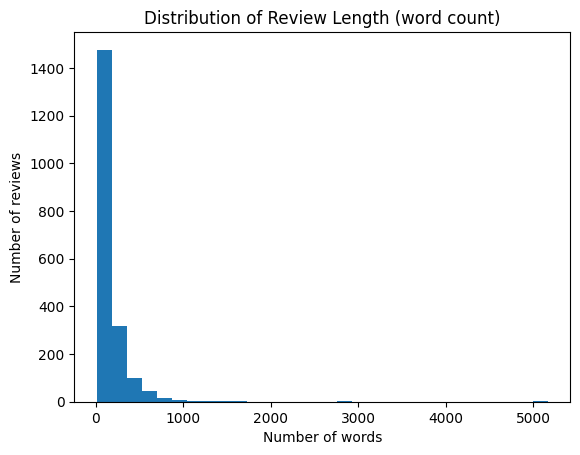

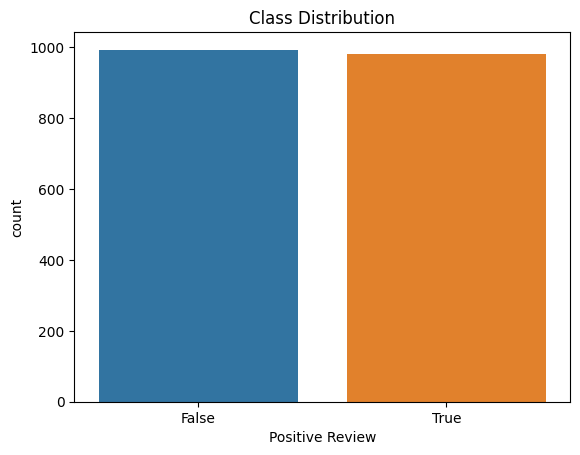

In [7]:
def count_words(text):
    return len(str(text).split())

df['word_count'] = df['Review'].apply(count_words)

print("\nReview word count stats:")
print(df['word_count'].describe())

# Visualize word count distribution
plt.hist(df['word_count'], bins=30)
plt.title("Distribution of Review Length (word count)")
plt.xlabel("Number of words")
plt.ylabel("Number of reviews")
plt.show()

# Visualize class distribution
sns.countplot(x='Positive Review', data=df)
plt.title("Class Distribution")
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I will use the review text as the main feature and add word count. I’ll remove any irrelevant columns. Text will be cleaned and converted to numerical features using TF-IDF with unigrams and bigrams. Data will be split into training and testing sets. I’ll build a neural network with several dense layers and dropout, ending with a sigmoid output for binary classification. The model will be trained with binary cross-entropy loss and SGD optimizer. I’ll monitor training and validation performance, then test on unseen data. I’ll adjust hyperparameters if needed to improve results.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
import time
import tensorflow.keras as keras


2025-07-29 03:03:31.003266: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-29 03:03:31.003294: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [9]:
y = df['Positive Review']
X = df['Review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# 2. Fit TF-IDF vectorizer on training data only
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,2))
tfidf_vectorizer.fit(X_train)

# 3. Transform train and test data
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 4. Get vocabulary size from the fitted vectorizer
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print("Vocabulary size:", vocabulary_size)

Vocabulary size: 8943


In [41]:
# Build neural network model

nn_model = Sequential()
nn_model.add(InputLayer(input_shape=(vocabulary_size,)))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))


nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1144832   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 1,153,153
Trainable params: 1,153,153
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 6. Compile model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [43]:
# Train model with silent training and custom progress print every 5 epochs
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs, every_n=5):
        self.num_epochs = num_epochs
        self.every_n = every_n
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            log_str = ", ".join([f"{k}: {v:.4f}" for k, v in logs.items()])
            print(f"Epoch [{epoch + 1}/{self.num_epochs}], {log_str}")

Epoch 1/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4211 - val_accuracy: 0.8176
Epoch 2/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4231 - val_accuracy: 0.8176
Epoch 3/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4222 - val_accuracy: 0.8142
Epoch 4/30
37/37 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4302 - val_accuracy: 0.8142
Epoch 5/30
37/37 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4266 - val_accuracy: 0.8108
Epoch [5/30], loss: 0.0023, accuracy: 1.0000, val_loss: 0.4266, val_accuracy: 0.8108
Epoch 6/30
37/37 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4257 - val_accuracy: 0.8142
Epoch 7/30
37/37 [==============================] - 0s 2ms/step - loss: 0.0

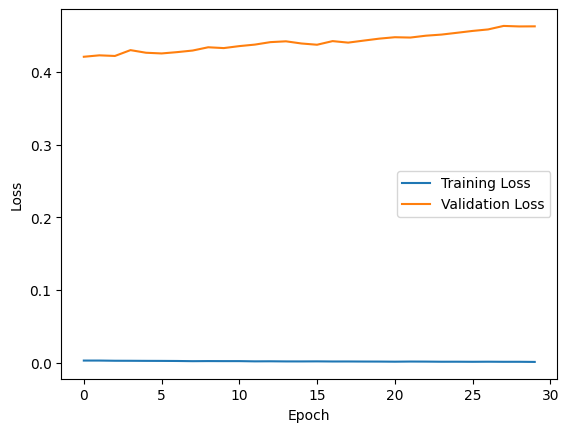

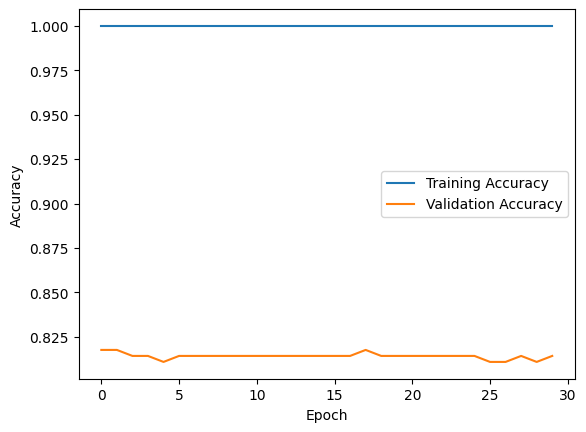

In [48]:
num_epochs = 30
history = nn_model.fit(
    X_train_tfidf.toarray(), y_train,
    epochs=num_epochs,
    validation_split=0.2,
    verbose=1,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

pred_probs = nn_model.predict(X_test_tfidf.toarray())
print("Predictions for first 20 test reviews:")
for i in range(20):
    pred_label = 1 if pred_probs[i] > 0.5 else 0
    print(f"Predicted: {pred_label}, Prob: {pred_probs[i][0]:.4f}, Actual: {y_test.iloc[i]}")

16/16 [==============================] - 0s 885us/step - loss: 0.4341 - accuracy: 0.8320
Test Loss: 0.4341, Test Accuracy: 0.8320
Predictions for first 20 test reviews:
Predicted: 0, Prob: 0.0062, Actual: False
Predicted: 0, Prob: 0.4602, Actual: True
Predicted: 1, Prob: 0.9979, Actual: True
Predicted: 1, Prob: 0.9996, Actual: True
Predicted: 0, Prob: 0.4119, Actual: True
Predicted: 1, Prob: 0.7497, Actual: True
Predicted: 0, Prob: 0.0000, Actual: False
Predicted: 1, Prob: 0.9941, Actual: True
Predicted: 0, Prob: 0.2167, Actual: False
Predicted: 0, Prob: 0.1747, Actual: False
Predicted: 0, Prob: 0.4162, Actual: True
Predicted: 0, Prob: 0.0028, Actual: False
Predicted: 0, Prob: 0.0101, Actual: False
Predicted: 0, Prob: 0.3209, Actual: True
Predicted: 1, Prob: 0.5842, Actual: False
Predicted: 1, Prob: 0.8180, Actual: True
Predicted: 1, Prob: 0.9935, Actual: True
Predicted: 0, Prob: 0.2809, Actual: False
Predicted: 1, Prob: 0.9991, Actual: True
Predicted: 0, Prob: 0.0002, Actual: False


In [40]:
print('Review #4:\n')
print(X_test.to_numpy()[1])

goodReview = True if pred_probs[1] >= 0.5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview))
print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[4]))

Review #4:

Truly the author's pen is mightier than the sword as he takes on Christmas, parents, children, evangelical Christians from Kentucky, television, Macy's, the result of a dalliance during the Viet Nam War, and "keeping up with the Joneses".  

This short book is much funnier than his best-selling "Me Talk Pretty Some Day" as the author's humorous cynicism is at its best.  One can't put it down for fear of missing some insight into the American psyche.

Three of the stories appear to be autobiographical (with obvious changes made to "protect the innocent") wherein the author "tells" the others in the guise of another.  

Regardless, Sedaris pulls no punches and will have the reader in stitches, even if there's a little guilt attached to that feeling.


Prediction: Is this a good review? False

Actual: Is this a good review? True

